# Simple clean data
This code demos a simpletrain, test and validation split.


In [1]:
import datetime
#from pathlib import Path
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import os.path

In [2]:
# This can be varied to point to different files.
# However, different files have different columns.

# sample data for easy x+y=z
# JUST z=10
CSV_FILE_NAME = "xyz10.csv"

# sample data for easy x+y=z with various sums
#CSV_FILE_NAME = "xyz.csv"


os.environ['CSV_FILE_NAME'] = CSV_FILE_NAME

In [3]:
# The current directory will be where this src file is located.
# Which is in the notebooks dir of the project
dirpath = os.getcwd()
print("current directory is : " + dirpath)

current directory is : /Users/davis/progs/github/Keras-Philosophy/notebooks


In [4]:
# Use pathlib to find the root dir of the git repo
root_path = pathlib.PurePath(dirpath).parents[0]
data_path = root_path / 'data'
logs_path = root_path / 'logs'
print("root directory is: ", root_path)
print("data directory is: ",  data_path)
print("logs directory is: ", logs_path)

root directory is:  /Users/davis/progs/github/Keras-Philosophy
data directory is:  /Users/davis/progs/github/Keras-Philosophy/data
logs directory is:  /Users/davis/progs/github/Keras-Philosophy/logs


In [5]:
# Create equivalent dir names in the environment
# Logs
LOGS_DIR_NAME = logs_path.as_posix()
print("LOGS_DIR_NAME: ", LOGS_DIR_NAME)
os.environ['LOGS_DIR_NAME'] = LOGS_DIR_NAME
# Data
DATA_DIR_NAME = data_path.as_posix()
print("DATA_DIR_NAME: ", DATA_DIR_NAME)
os.environ['DATA_DIR_NAME'] = DATA_DIR_NAME

LOGS_DIR_NAME:  /Users/davis/progs/github/Keras-Philosophy/logs
DATA_DIR_NAME:  /Users/davis/progs/github/Keras-Philosophy/data


In [6]:
%%bash
# Verify env variables are set
echo ${DATA_DIR_NAME}
echo ${LOGS_DIR_NAME}
echo ${CSV_FILE_NAME}

/Users/davis/progs/github/Keras-Philosophy/data
/Users/davis/progs/github/Keras-Philosophy/logs
xyz10.csv


In [7]:
%%bash
head -n 5 "${DATA_DIR_NAME}/${CSV_FILE_NAME}"

z,x,y
10.0,10.0,0.0
10.0,9.0,1.0
10.0,8.0,2.0
10.0,7.0,3.0


# Use generic python to read data into pandas dataframe

## In case of nans, 
In order to add default values for NA data, use the converters helper functions

## In case of missing data, 
In order to add default values for missing data use average value for column/feature average.  Averages were calculated seperately.

In [8]:
raw_dataset = pd.read_csv(data_path / CSV_FILE_NAME, 
                          header=0,
                          sep=",")

dataset = raw_dataset.copy()

In [9]:
dataset.shape
#dataset.head()

(11, 3)

# Plot the Data

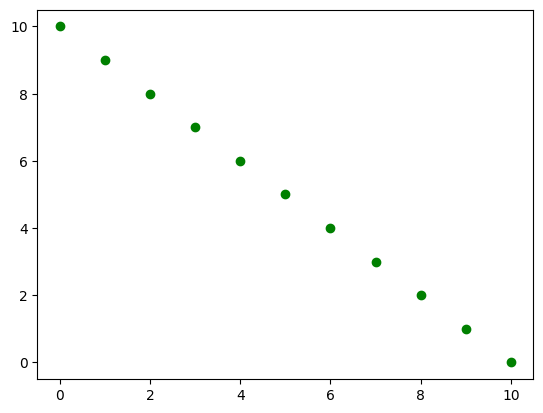

In [10]:
plt.scatter(dataset['y'], dataset['x'], c='green')

# Splitting the datasets

* Train is used to train the dataset
* Validation is used to tune hyperparameters
* Test is set aside to evaluate the result

In [11]:
train_ds = dataset.sample(frac=0.7,random_state=3367)
# what's leftover will be split into test and train evenly
leftover_ds = dataset.drop(train_ds.index) 

# Ideally the valid/test split would be 50% but 
# in this case I am dealing with possibly a small dataset
# and I want to make sure I have more in valid set than test 
# set

test_ds = leftover_ds.sample(frac=0.2, random_state=3367)
valid_ds = leftover_ds.drop(test_ds.index)

In [12]:
train_ds

,z,x,y
3,10.0,7.0,3.0
8,10.0,2.0,8.0
7,10.0,3.0,7.0
4,10.0,6.0,4.0
0,10.0,10.0,0.0
10,10.0,0.0,10.0
1,10.0,9.0,1.0
5,10.0,5.0,5.0


In [13]:
test_ds

,z,x,y
2,10.0,8.0,2.0


In [14]:
valid_ds

,z,x,y
6,10.0,4.0,6.0
9,10.0,1.0,9.0


In [15]:
leftover_ds

,z,x,y
2,10.0,8.0,2.0
6,10.0,4.0,6.0
9,10.0,1.0,9.0


In [16]:
# Create a function to look for nans in the dataframe
# call via nans(dataset)
nans = lambda df: df[df.isnull().any(axis=1)]

In [17]:
#
# You can do either of these mechanisms to get the nan_rows. 
#


# use the lambda and suffix on the one column which will make them
nan_rows = nans(train_ds)['z']

# or use procedure directly and not limit output to the particular column
#nan_rows = normed_train_ds[normed_train_ds.isnull().T.any()]

In [18]:
nan_rows

Series([], Name: z, dtype: float64)

In [19]:
# replace the nans with max value for the column
# err, replace with 1
train_ds.fillna(1.0, inplace=True)
test_ds.fillna(1.0, inplace=True)
valid_ds.fillna(1.0, inplace=True)

In [20]:
#train_ds
#valid_ds.head()
test_ds.head()

,z,x,y
2,10.0,8.0,2.0


# write the datasets to disk

In [21]:
train_ds.to_csv(data_path /  pathlib.PurePath("train.csv"), encoding='utf-8', index=False)
test_ds.to_csv(data_path / pathlib.PurePath("test.csv"), encoding="utf-8", index=False)
valid_ds.to_csv(data_path / pathlib.PurePath("valid.csv"), encoding='utf-8', index=False)


In [24]:
print(data_path /  pathlib.PurePath("train.csv"))

/Users/davis/progs/github/Keras-Philosophy/data/train.csv


In [25]:
train_ds.describe()

,z,x,y
count,8.0,8.000000,8.000000
mean,10.0,5.250000,4.750000
std,0.0,3.453776,3.453776
min,10.0,0.000000,0.000000
25%,10.0,2.750000,2.500000
50%,10.0,5.500000,4.500000
75%,10.0,7.500000,7.250000
max,10.0,10.000000,10.000000


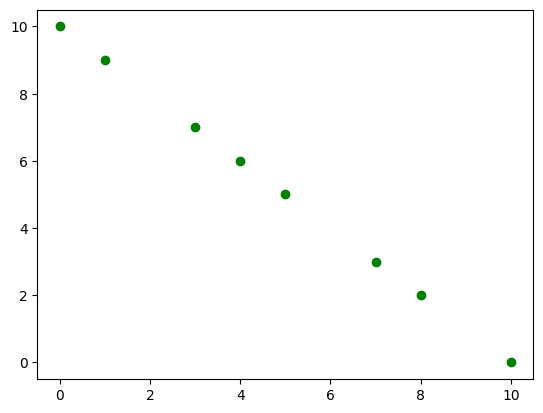

In [26]:
plt.scatter(train_ds['y'], train_ds['x'], c='green')

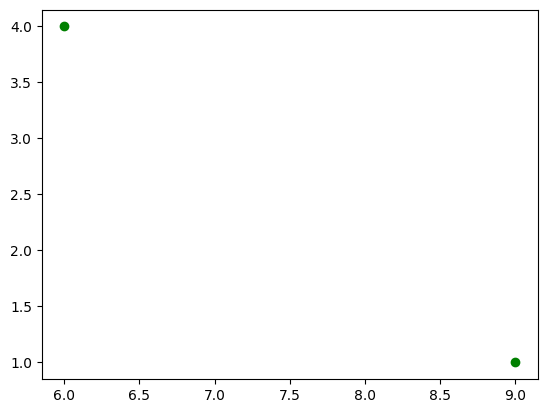

In [27]:
plt.scatter(valid_ds['y'], valid_ds['x'], c='green')

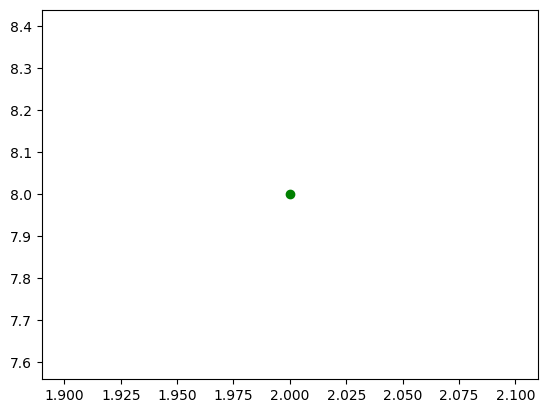

In [28]:
plt.scatter(test_ds['y'], test_ds['x'], c='green')